# Moho Models
**Description:**  Moho elevation grids and point measurements from various sources. 

**Associated papers:**

Shen, Weisen, Douglas A. Wiens, Sridhar Anandakrishnan, Richard C. Aster, Peter Gerstoft, Peter D. Bromirski, Samantha E. Hansen, et al. “The Crust and Upper Mantle Structure of Central and West Antarctica from Bayesian Inversion of Rayleigh Wave and Receiver Functions.” Journal of Geophysical Research: Solid Earth 123, no. 9 (2018): 7824–49. https://doi.org/10.1029/2017JB015346.

An, Meijian, Douglas A. Wiens, Yue Zhao, Mei Feng, Andrew A. Nyblade, Masaki Kanao, Yuansheng Li, Alessia Maggi, and Jean-Jacques Lévêque. “S-Velocity Model and Inferred Moho Topography beneath the Antarctic Plate from Rayleigh Waves: Antarctic S-Velocities and Moho.” Journal of Geophysical Research: Solid Earth 120, no. 1 (2015): 359–83. https://doi.org/10.1002/2014JB011332.

Baranov, A., R. Tenzer, and A. Morelli. 2021. “Updated Antarctic Crustal Model.” Gondwana Research 89 (January): 1–18. https://doi.org/10.1016/j.gr.2020.08.010.

Borghi, Alessandra. 2022. “Moho Depths for Antarctica Region by the Inversion of Ground-Based Gravity Data.” Geophysical Journal International 231 (2): 1404–20. https://doi.org/10.1093/gji/ggac249.

Li, L., and A. R. A. Aitken. 2024. “Crustal Heterogeneity of Antarctica Signals Spatially Variable Radiogenic Heat Production.” Geophysical Research Letters 51 (2): e2023GL106201. https://doi.org/10.1029/2023GL106201.

Ji, Fei, Leyuan Wu, and Qiao Zhang. 2022. “Gravity-Derived Antarctic Crustal Thickness Based on the Gauss-FFT Method.” Geochemistry, Geophysics, Geosystems 23 (8): e2022GC010555. https://doi.org/10.1029/2022GC010555.

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions, utils

In [5]:
version_names = [
    "an-2015",
    "shen-2018",
    "baranov-2021",
    "borghi-2022",
    "li-2023",  # gives a dataset with `upward` and `uncertainty` variables
    "ji-2022",
]

grids = []
for name in version_names:
    data = fetch.moho(
        version=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    if name == "li-2023":
        data = data["upward"]
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for an-2015
grid spacing: 20000.0 m
grid region: (-3300000.0, 3300000.0, -3300000.0, 3300000.0)
grid zmin: -64885.140625
grid zmax: -6265.95361328
grid registration: g
##########
Info for shen-2018
grid spacing: 10000.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: -56434.2734375
grid zmax: -18005.0996094
grid registration: g
##########


/home/sungw937/miniforge3/envs/polartoolkit/lib/python3.13/site-packages/zarr/api/asynchronous.py:244: ZarrUserWarning: Consolidated metadata is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  warnings.warn(


Info for baranov-2021
grid spacing: 50000.0 m
grid region: (-3300000.0, 3300000.0, -3300000.0, 3300000.0)
grid zmin: -59132.2773438
grid zmax: -5217.92724609
grid registration: g
##########
Info for borghi-2022
grid spacing: 10000.0 m
grid region: (-3150000.0, 3220000.0, -2120000.0, 3010000.0)
grid zmin: -54782.8984375
grid zmax: -20059.703125
grid registration: g
##########
Info for li-2023
grid spacing: 20000.0 m
grid region: (-3340000.0, 3340000.0, -3340000.0, 3340000.0)
grid zmin: -56260.125
grid zmax: -7457.54882812
grid registration: p
##########
Info for ji-2022
grid spacing: 10000.0 m
grid region: (-2710000.0, 2930000.0, -2340000.0, 2400000.0)
grid zmin: -58622.640625
grid zmax: -4044.28857422
grid registration: g
##########


In [6]:
an_2015_points = fetch.moho(
    version="an-2015-points",
)
an_2015_points

,Name,lon,lat,crustal_thickness,moho_elevation,Sources,x,y
0,9169,-6.0200,-75.0000,45000.0,-42300.0,1,-1.718684e+05,1.629746e+06
1,9172,-9.7000,-73.6000,44000.0,-42600.0,1,-3.022151e+05,1.768031e+06
2,96100B,5.9000,-67.7000,12000.0,-16000.0,2,2.521265e+05,2.439778e+06
3,96100E,6.1000,-69.7000,23000.0,-25000.0,2,2.367647e+05,2.215463e+06
4,96110B,-14.1000,-69.0000,10000.0,-14000.0,2,-5.619126e+05,2.237068e+06
...,...,...,...,...,...,...,...,...
201,WRS-6,170.7730,-77.0716,18200.0,-19000.0,19,2.261608e+05,-1.392202e+06
202,WRS-7,171.1800,-77.0539,19200.0,-20000.0,19,2.165642e+05,-1.395697e+06
203,WRS-8,171.5800,-77.0551,20300.0,-21000.0,19,2.067959e+05,-1.397044e+06
204,WRS-9,171.9880,-77.0641,20300.0,-21000.0,19,1.967045e+05,-1.397501e+06


/home/sungw937/polartoolkit/src/polartoolkit/maps.py:1520: FutureWarning: The 'barwidth' parameter has been deprecated since v0.18.0 and will be removed in v0.20.0. Please use 'bar_width' instead.
  self.histogram(
/home/sungw937/polartoolkit/src/polartoolkit/maps.py:1520: FutureWarning: The 'barwidth' parameter has been deprecated since v0.18.0 and will be removed in v0.20.0. Please use 'bar_width' instead.
  self.histogram(
/home/sungw937/polartoolkit/src/polartoolkit/maps.py:1520: FutureWarning: The 'barwidth' parameter has been deprecated since v0.18.0 and will be removed in v0.20.0. Please use 'bar_width' instead.
  self.histogram(
/home/sungw937/polartoolkit/src/polartoolkit/maps.py:1520: FutureWarning: The 'barwidth' parameter has been deprecated since v0.18.0 and will be removed in v0.20.0. Please use 'bar_width' instead.
  self.histogram(
/home/sungw937/polartoolkit/src/polartoolkit/maps.py:1520: FutureWarning: The 'barwidth' parameter has been deprecated since v0.18.0 and wil

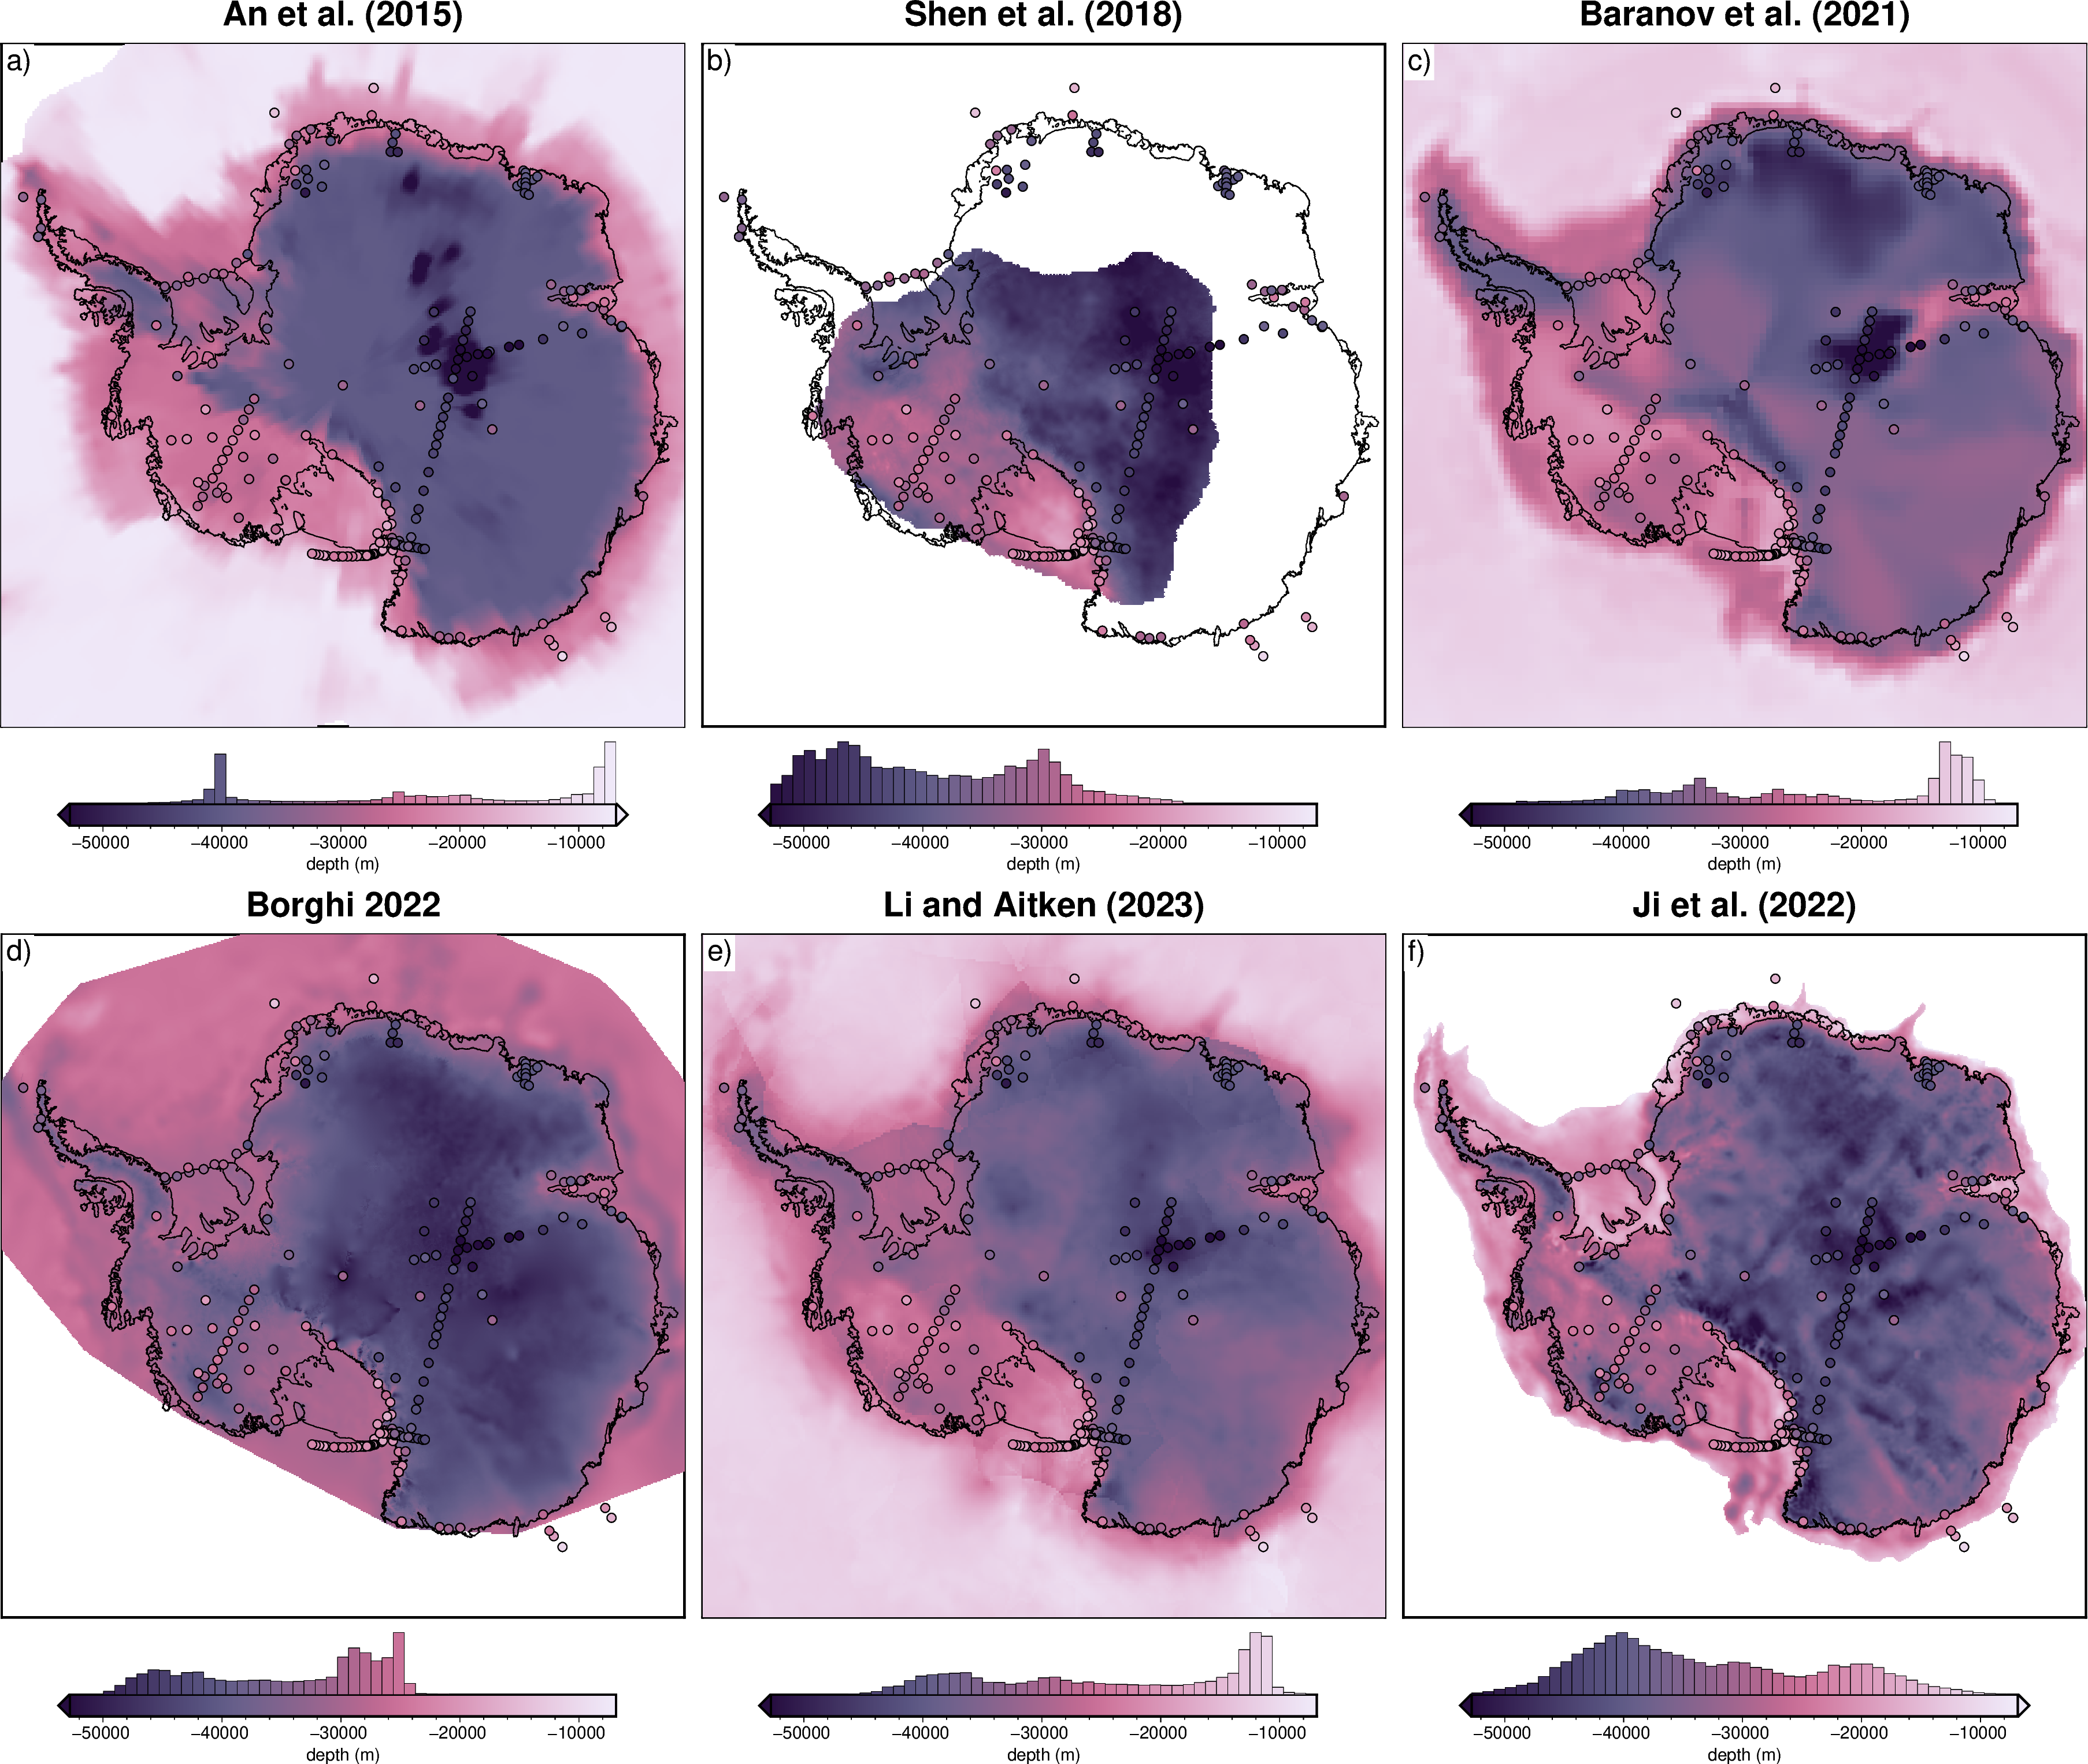

In [7]:
cpt_lims = utils.get_combined_min_max(grids, robust=True)

fig = maps.subplots(
    grids=grids,
    region=regions.antarctica,
    titles=[
        "An et al. (2015)",
        "Shen et al. (2018)",
        "Baranov et al. (2021)",
        "Borghi 2022",
        "Li and Aitken (2023)",
        "Ji et al. (2022)",
    ],
    cmap="acton",
    cpt_lims=cpt_lims,
    cbar_label="depth (m)",
    hist=True,
    hemisphere="south",
    coast=True,
    points=an_2015_points,
    points_fill="moho_elevation",
    points_pen=".6p,black",
)
fig.show(dpi=200)